In [1]:
# Plot
import os
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
from itertools import product

sns.set_theme(style="darkgrid")

n_repetitions = 5
results_dir = "./results/results_mnist_1223_3"
results = pd.read_csv(os.path.join(results_dir, "results_mnist_42.csv"))
for i in range(1, n_repetitions):
    result_ = pd.read_csv(os.path.join(results_dir, f"results_mnist_{42+i}.csv"))
    results = results.append(result_, ignore_index=True)

results = results.rename(columns={"mean_perf": "Performance"})
print(results)
results.to_csv(os.path.join(results_dir, "results_mnist.csv"), index=False)

                                                 perf  Performance  \
0   [0.7273, 0.9175, 0.9425, 0.957, 0.9637, 0.9684...     0.980467   
1   [0.122, 0.1294, 0.1218, 0.1568, 0.2055, 0.2364...     0.508600   
2   [0.165, 0.2172, 0.5073, 0.6022, 0.6503, 0.7158...     0.867500   
3   [0.1644, 0.1525, 0.1883, 0.2184, 0.2929, 0.363...     0.728300   
4   [0.0934, 0.1351, 0.2132, 0.1863, 0.2737, 0.297...     0.537000   
5   [0.1233, 0.1912, 0.2536, 0.5275, 0.5749, 0.663...     0.860900   
6   [0.1104, 0.1153, 0.0984, 0.1364, 0.2268, 0.163...     0.440700   
7   [0.1171, 0.2015, 0.1771, 0.2366, 0.2558, 0.266...     0.462600   
8   [0.1116, 0.3476, 0.4826, 0.5816, 0.6449, 0.698...     0.863900   
9   [0.1031, 0.1083, 0.3287, 0.3691, 0.4694, 0.496...     0.703600   
10  [0.6734, 0.9075, 0.9435, 0.9552, 0.9621, 0.966...     0.980467   
11  [0.105, 0.2094, 0.1931, 0.1582, 0.2373, 0.3443...     0.588500   
12  [0.1386, 0.2367, 0.3434, 0.5892, 0.6451, 0.668...     0.861100   
13  [0.1846, 0.1199,

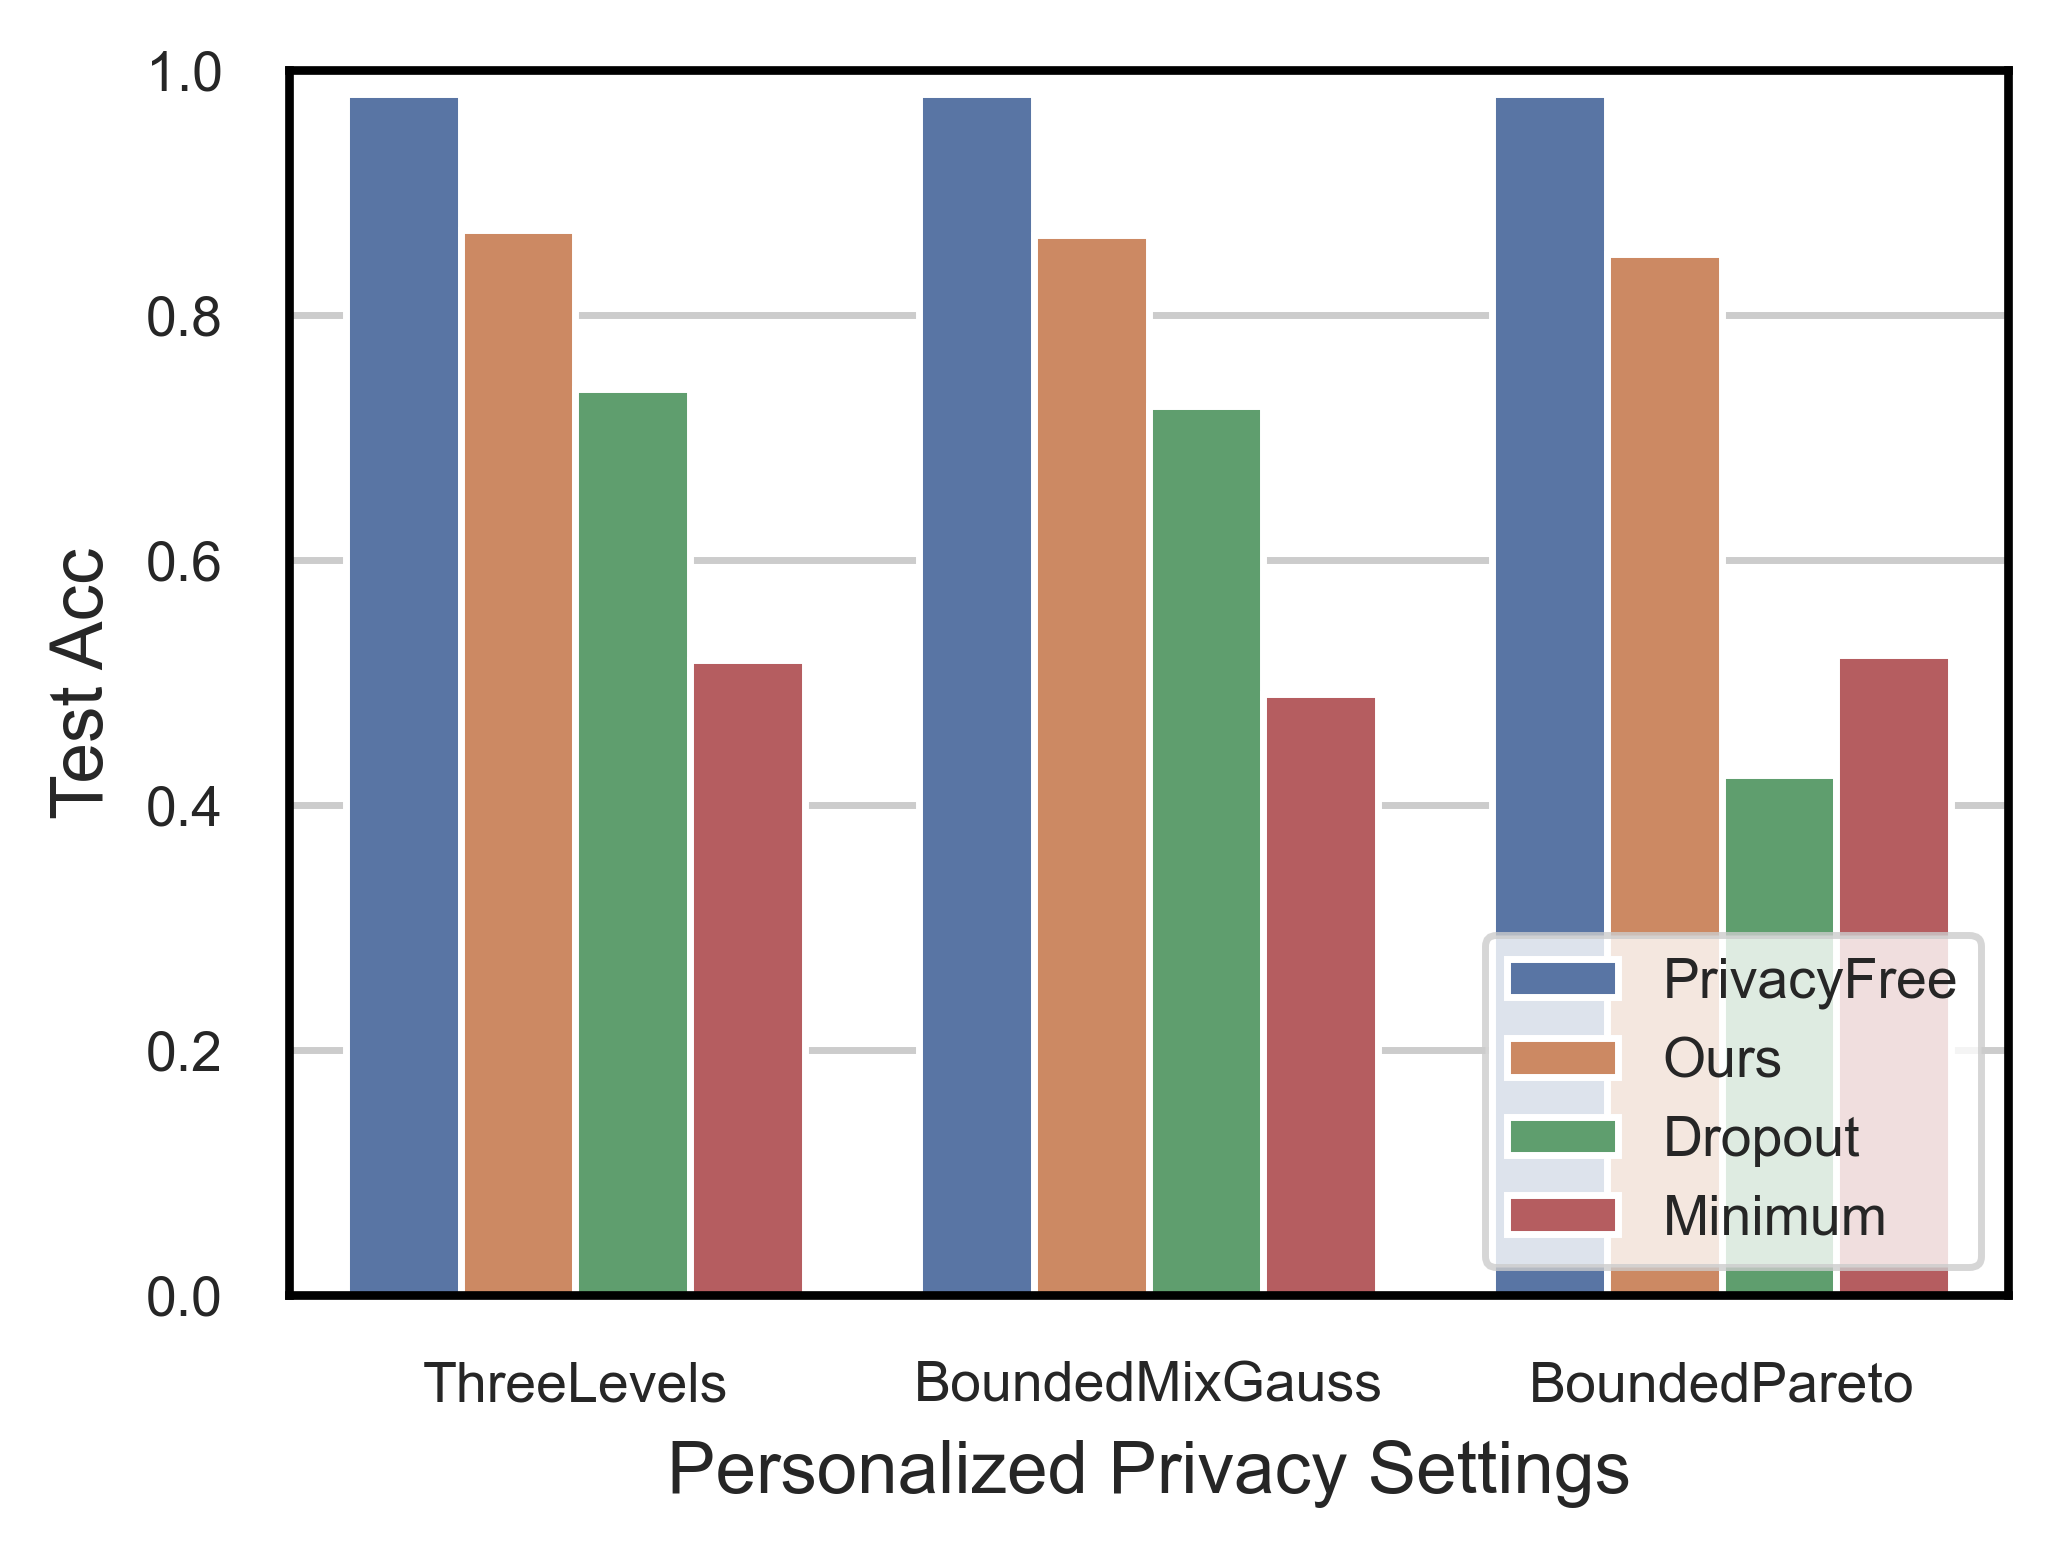

In [5]:
import seaborn as sns
# sns.set_theme(style="darkgrid")
sns.set_style('whitegrid', {'axes.linewidth': 1, 'axes.edgecolor':'black'}) #风格、轮廓线
# sns.set_palette(palette=sns.color_palette('bright')) #颜色

linestyle_str = [
    ("solid", "solid"),  # Same as (0, ()) or '-'
    ("dotted", "dotted"),  # Same as (0, (1, 1)) or ':'
    ("dashed", "dashed"),  # Same as '--'
    ("dashdot", "dashdot"),
]
linestyle_tuple = [
    ("loosely dotted", (0, (1, 10))),
    ("densely dotted", (0, (1, 1))),
    ("loosely dashed", (0, (5, 10))),
    ("densely dashed", (0, (5, 1))),
    ("loosely dashdotted", (0, (3, 10, 1, 10))),
    ("densely dashdotted", (0, (3, 1, 1, 1))),
    ("dashdotdotted", (0, (3, 5, 1, 5, 1, 5))),
    ("loosely dashdotdotted", (0, (3, 10, 1, 10, 1, 10))),
    ("densely dashdotdotted", (0, (3, 1, 1, 1, 1, 1))),
]
linestyles = linestyle_tuple + linestyle_str
legend_font = {'style': 'normal', 'size': 8, 'weight': "normal"}
label_font = {'family':'sans-serif', 'size': 10.5, 'weight': "normal"}
title_font = {'family':'sans-serif', 'size': 10.5, 'weight': "bold"}

results = pd.read_csv(os.path.join(results_dir, "results_mnist.csv"))
nmdeltas = [(d, nm) for d, nm in zip(results["d"].unique(), results["nm"].unique()) if not (np.isnan(d))]
nms = [nm for nm in results["nm"].unique() if not (np.isnan(nm))]
enames = ['ThreeLevels', 'BoundedMixGauss', 'BoundedPareto']
methods = ['PrivacyFree', 'Ours', 'Dropout', 'StrongForAll']
deltas = [d for d in results["d"].unique() if not (np.isnan(d))]
edeltas = [(e, d) for e, d in list(product(enames, deltas)) if not (np.isnan(d))]

# vision
plt.close('all')
fig, ax = plt.subplots(1, 1, figsize=(4, 3), constrained_layout=True, dpi=500)
all_results = pd.DataFrame()
for i, (e,d) in enumerate(edeltas):
    for method in methods:
        if method == "PrivacyFree":
            cdf = results.loc[results["e"] == method]
        else:
            cdf = results.loc[results["e"].str.contains(e, na=False)].loc[results["e"].str.contains(method, na=False)].loc[results["d"] == d].loc[results["nm"] == nms[0]]

        cdf_ = cdf.copy() # 需先copy，否则会报警告
        cdf_["method"] = method if method != "StrongForAll" else "Minimum"
        cdf_["epsilon"] = e
        cdf_["mean_values"] = np.array(cdf["Performance"].tolist()).mean()
        
        all_results = all_results.append(cdf_, ignore_index=True)
        del cdf

# 以 epsilon 为x轴，mean_values 为y轴，按照 method 区分类别，绘制条形图
sns.barplot(data=all_results, x="epsilon", y="mean_values", hue="method")

ax.set_ylim(0, 1.0)
ax.tick_params(labelsize=8)

plt.legend(loc='lower right', prop=legend_font)
plt.xlabel("Personalized Privacy Settings", **label_font)
plt.ylabel("Test Acc", **label_font)
plt.ylim(0, 1.0)
plt.savefig(os.path.join(results_dir, "fed_perf_hist.pdf"), dpi=100, bbox_inches="tight")
plt.show()

# All plots

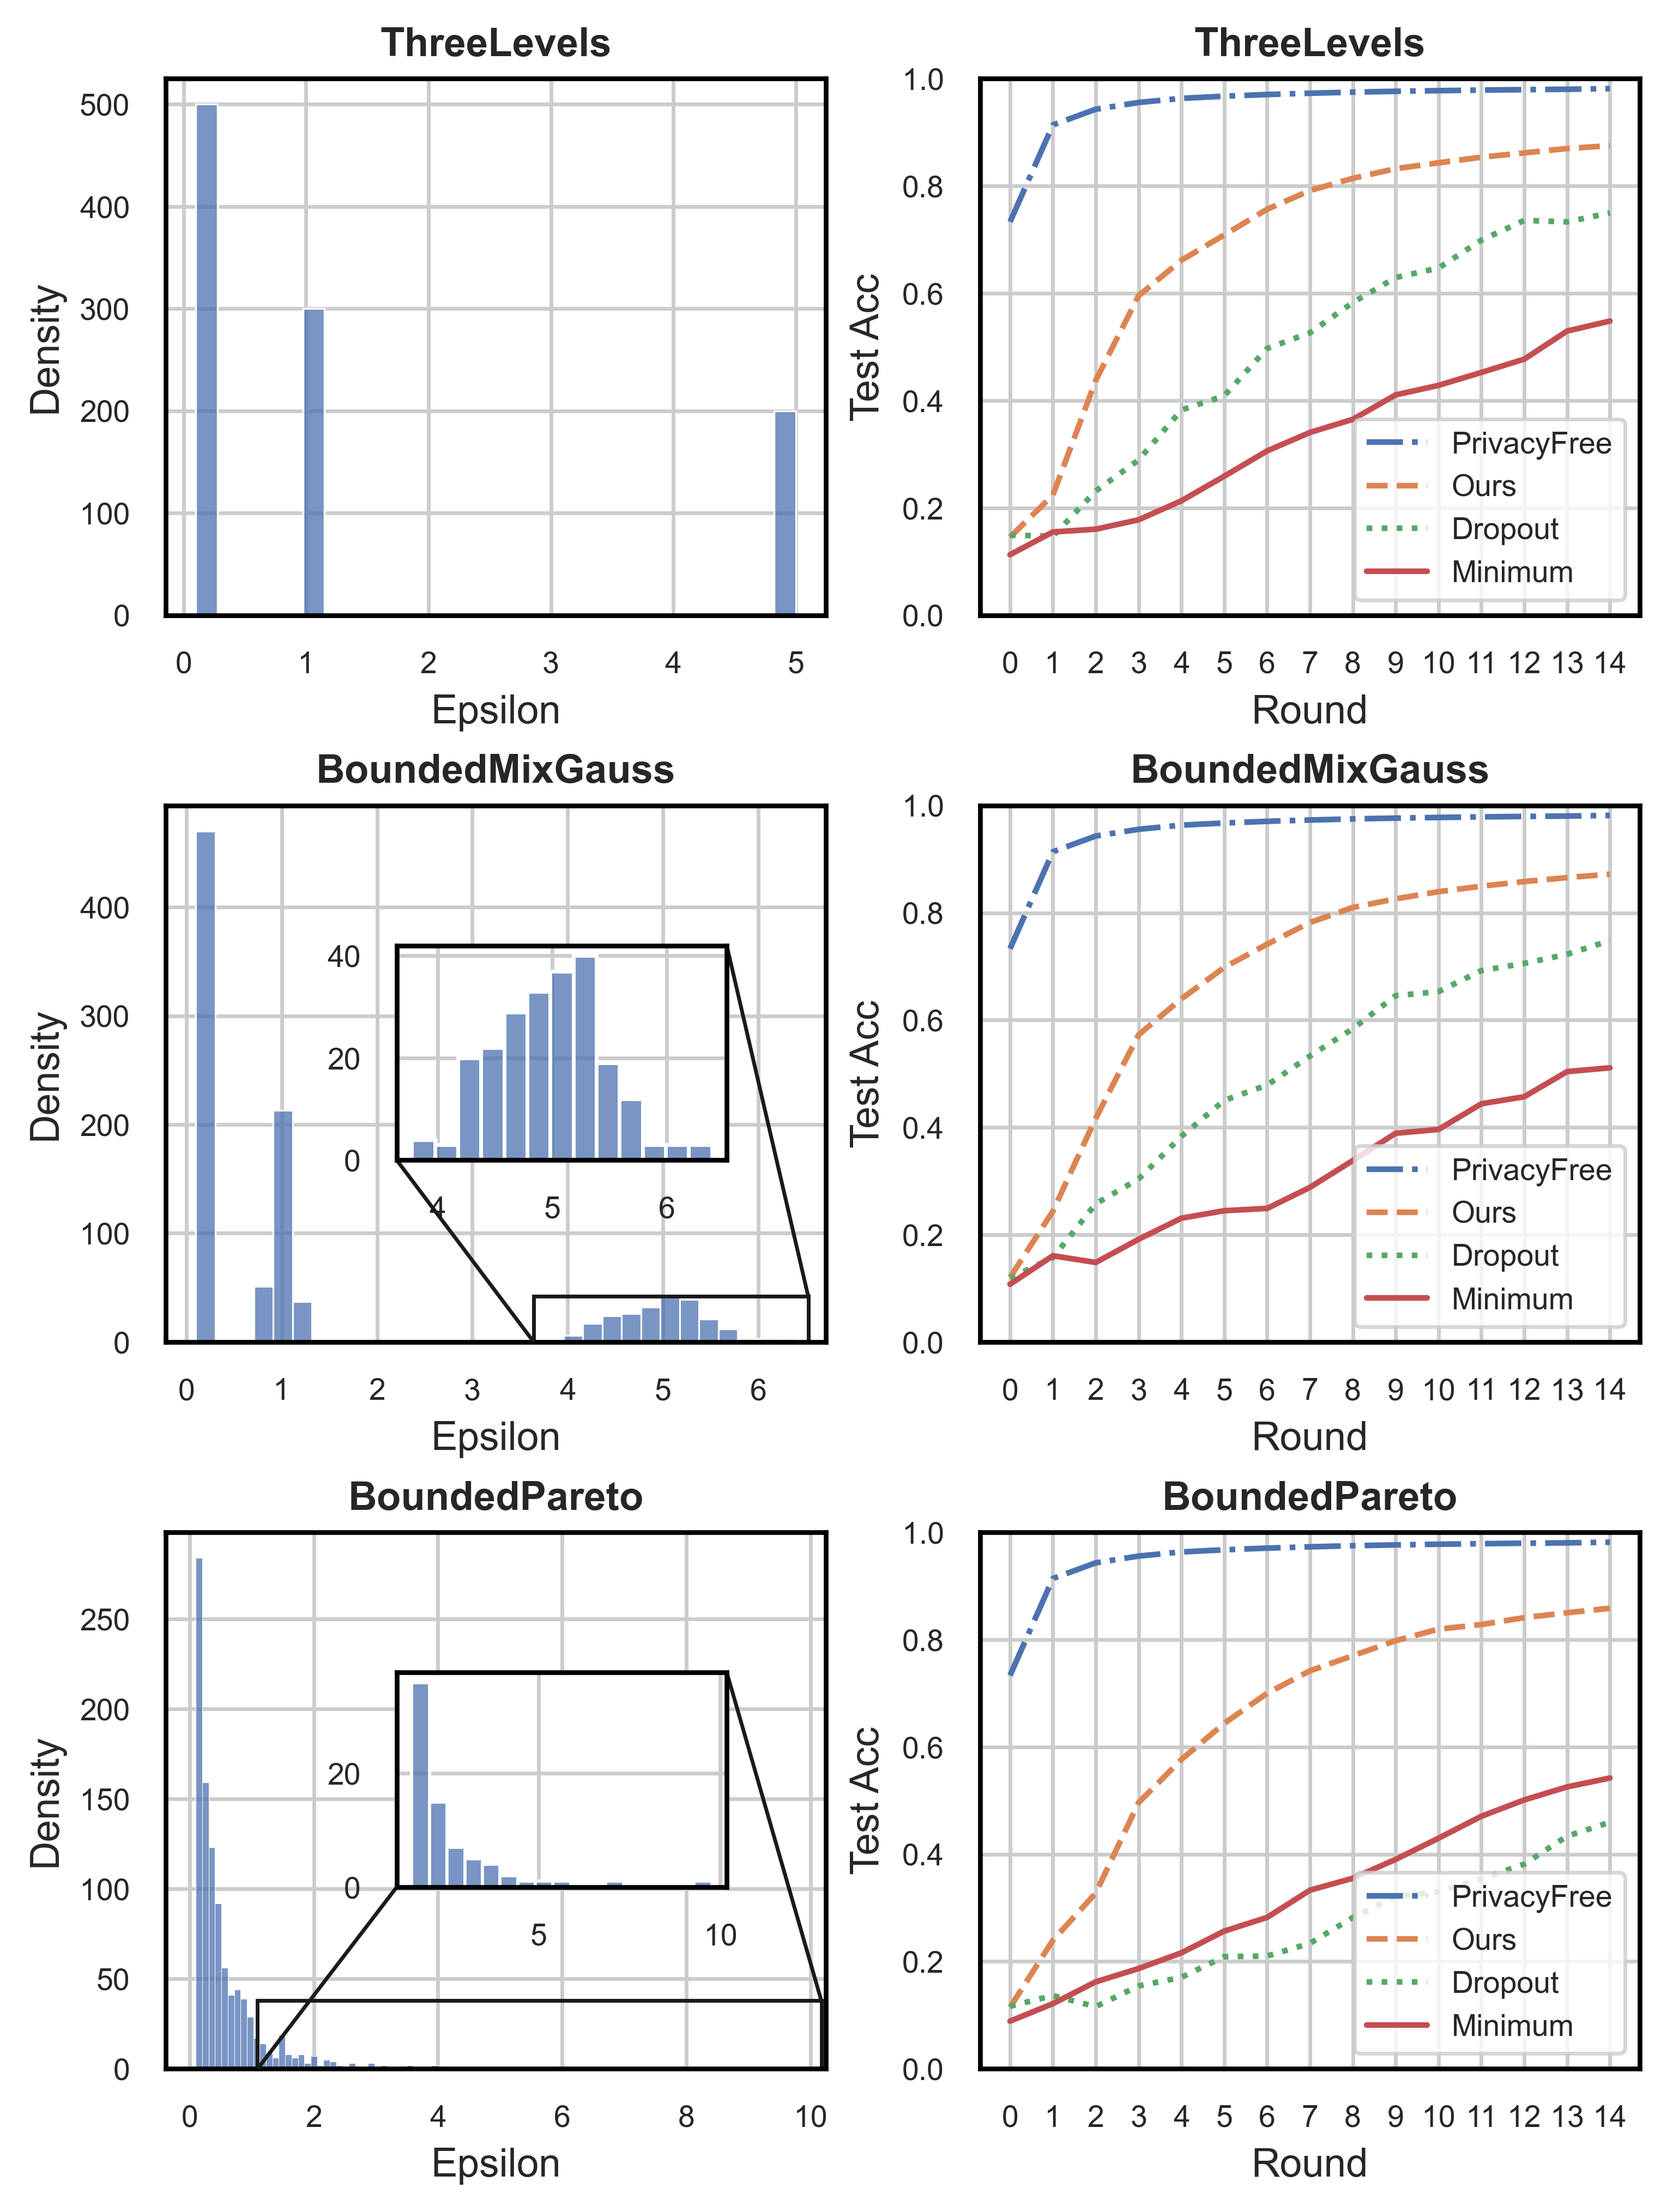

In [7]:
import sys 
sys.path.append("../..")
import json
from sklearn.metrics import r2_score
from fedrpdp.utils.rpdp_utils import MultiLevels, MixGauss, Pareto
from mpl_toolkits.axes_grid1.inset_locator import inset_axes
from mpl_toolkits.axes_grid1.inset_locator import mark_inset

GENERATE_EPSILONS = {
    "ThreeLevels": lambda n, params: MultiLevels(3, *params, n),
    "BoundedMixGauss": lambda n, params: MixGauss(*params, n),
    "BoundedPareto": lambda n, params: Pareto(*params, n), 
}
SETTINGS = {
    "ThreeLevels": [[[0.5,0.3,0.2], [0.1, 1.0, 5.0]]],
    "BoundedPareto": [[3, 0.1]], 
    "BoundedMixGauss": [[[0.5,0.3,0.2], [(0.1, 0.05), (1.0, 0.1), (5.0, 0.5)]]],
}
MIN_EPSILON, MAX_EPSILON = 0.1, 10.0
BoundedFunc = lambda values: np.array([min(max(x, MIN_EPSILON), MAX_EPSILON) for x in values])

total_points = 1000
enames = list(GENERATE_EPSILONS.keys())
deltas = [d for d in results["d"].unique() if not (np.isnan(d))]

# vision
plt.close('all')
fig, axs = plt.subplots(3, 2, figsize=(6, 8), constrained_layout=True, dpi=500)

colors = ['b','g','grey']
for i, ename in enumerate(enames):
    for j, params in enumerate(SETTINGS[ename]):
        target_epsilons = BoundedFunc(GENERATE_EPSILONS[ename](total_points, params))
        sns.histplot(x=target_epsilons, stat="count", ax=axs[i][0], label=f'params{j}')
    
    axs[i][0].set_title(f'{ename}', **title_font)
    axs[i][0].set_ylabel('Density', **label_font)
    axs[i][0].set_xlabel('Epsilon', **label_font)
    axs[i][0].tick_params(labelsize=8)
    
    # ===============
    # 嵌入绘制局部放大图的坐标系
    if ename != 'ThreeLevels':
        axin = inset_axes(axs[i][0], width='50%', height='40%', loc='lower center', 
                           bbox_to_anchor=(0.1,0.3,1,1), 
                           bbox_transform=axs[i][0].transAxes)
        sub_temp = sns.histplot(x=target_epsilons[target_epsilons >= 1.5], ax=axin, stat="count")
        #color=sns.color_palette()[4]
        
        # ax4in.set_ylim(0, 30)
        axin.tick_params(labelsize=8)
        mark_inset(axs[i][0], axin, loc1=1, loc2=3, fc="none", ec='k', lw=1)
        axin.set_ylabel(None, **label_font)
    # ===============

nm = nms[0]
d = deltas[0]
for i, e in enumerate(enames):
    for j, method in enumerate(methods):
        if method == "PrivacyFree":
            cdf = results.loc[results["e"] == method]
        else:
            cdf = results.loc[results["e"].str.contains(e, na=False)].loc[results["e"].str.contains(method, na=False)].loc[results["d"] == d].loc[results["nm"] == nms[0]]
        perf_str = np.array(cdf["perf"].tolist())
        data_arr = np.array([json.loads(_str) for _str in perf_str])
        data_mean = data_arr.mean(axis=0)
        data_std = data_arr.std(axis=0)
        label = method if method != "StrongForAll" else "Minimum"
        sns.lineplot(data=data_mean, label=label, linestyle=linestyles[::-1][j][1], ax=axs[i][1])
    
    axs[i][1].set_title(f'{e}', **title_font)
    axs[i][1].legend(loc='upper right', prop=legend_font)
    axs[i][1].set_ylabel('Test Acc', **label_font)
    axs[i][1].set_xlabel('Round', **label_font)
    axs[i][1].set_ylim(0.0, 1.0)
    axs[i][1].set_xticks(range(15))
    axs[i][1].tick_params(labelsize=8)
    axs[i][1].legend(loc='lower right', prop=legend_font)

plt.savefig(os.path.join(results_dir, "fed_6plots.pdf"), dpi=500, bbox_inches='tight')
plt.show()

In [27]:
# Plot
import json
import math
from scipy.optimize import curve_fit
from sklearn.metrics import r2_score
from pynverse import inversefunc

import os
import sys 
sys.path.append("../..")

import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid', {'axes.linewidth': 1, 'axes.edgecolor':'black'}) #风格、轮廓线

import numpy as np
import pandas as pd
from itertools import product
from sklearn.metrics import r2_score

from fedrpdp.utils.rpdp_utils import MultiLevels, MixGauss, Pareto
from fedrpdp.accountants.rdp import RDPAccountant, compute_rdp_4fed, compute_rdp_4sgd
from fedrpdp.accountants.analysis import rdp as privacy_analysis

from mpl_toolkits.axes_grid1.inset_locator import inset_axes
from mpl_toolkits.axes_grid1.inset_locator import mark_inset

linestyle_str = [
    ("solid", "solid"),  # Same as (0, ()) or '-'
    ("dotted", "dotted"),  # Same as (0, (1, 1)) or ':'
    ("dashed", "dashed"),  # Same as '--'
    ("dashdot", "dashdot"),
]
linestyle_tuple = [
    ("loosely dotted", (0, (1, 10))),
    ("densely dotted", (0, (1, 1))),
    ("loosely dashed", (0, (5, 10))),
    ("densely dashed", (0, (5, 1))),
    ("loosely dashdotted", (0, (3, 10, 1, 10))),
    ("densely dashdotted", (0, (3, 1, 1, 1))),
    ("dashdotdotted", (0, (3, 5, 1, 5, 1, 5))),
    ("loosely dashdotdotted", (0, (3, 10, 1, 10, 1, 10))),
    ("densely dashdotdotted", (0, (3, 1, 1, 1, 1, 1))),
]
linestyles = linestyle_tuple + linestyle_str
legend_font = {'style': 'normal', 'size': 8, 'weight': "normal"}
label_font = {'family':'sans-serif', 'size': 10.5, 'weight': "normal"}
title_font = {'family':'sans-serif', 'size': 10.5, 'weight': "bold"}


n_repetitions = 5
results_dir = "./results/results_mnist_1225"
results = pd.read_csv(os.path.join(results_dir, "results_mnist_42.csv"))
for i in range(1, n_repetitions):
    result_ = pd.read_csv(os.path.join(results_dir, f"results_mnist_{42+i}.csv"))
    results = results.append(result_, ignore_index=True)

results = results.rename(columns={"mean_perf": "Performance"})
print(results)
results.to_csv(os.path.join(results_dir, "results_mnist.csv"), index=False)

GENERATE_EPSILONS = {
    "ThreeLevels": lambda n, params: MultiLevels(3, *params, n),
    "BoundedMixGauss": lambda n, params: MixGauss(*params, n),
    "BoundedPareto": lambda n, params: Pareto(*params, n), 
}
SETTINGS = {
    "ThreeLevels": [[[0.7,0.2,0.1], [0.1, 1.0, 5.0]]],
    "BoundedPareto": [[4, 0.1]], 
    "BoundedMixGauss": [[[0.7,0.2,0.1], [(0.1, 0.05), (1.0, 0.1), (5.0, 0.5)]]],
}
MIN_EPSILON, MAX_EPSILON = 0.1, 10.0
BoundedFunc = lambda values: np.array([min(max(x, MIN_EPSILON), MAX_EPSILON) for x in values])

enames = list(GENERATE_EPSILONS.keys())
deltas = [d for d in results["d"].unique() if not (np.isnan(d))]
nms = [nm for nm in results["nm"].unique() if not (np.isnan(nm))]

inner_rates = []
tmp_list = [1,2,3,4,5,6,7,8,9,10]
for mul in [0.1,0.01,0.001]:
    inner_rates.extend(list(map(lambda x: x * mul, tmp_list)))
inner_rates = sorted(np.unique(inner_rates))[1:] # delete q = 0.0
inner_rates = np.array(inner_rates, dtype=np.float32)
outer_rate=0.8 
inner_steps=50 
outer_steps=15
target_delta=1e-5

func = lambda x, a, b, c: np.exp(a*x + b) + c
func_str = lambda a, b, c: f"exp({a:.2f}q+{b:.2f}){c:.2f}"
# pre-defined rdp order list
dense = 1.07
orders = [int(dense ** i + 1) for i in range(int(math.floor(math.log(1000, dense))) + 1)]
orders = np.unique(orders)

                                                 perf  Performance  \
0   [0.146, 0.2364, 0.3634, 0.5512, 0.6609, 0.7239...       0.8744   
1   [0.1702, 0.2068, 0.4402, 0.6255, 0.6777, 0.740...       0.8743   
2   [0.1435, 0.1977, 0.2963, 0.605, 0.6927, 0.7288...       0.8760   
3   [0.1421, 0.2086, 0.3135, 0.5772, 0.655, 0.7067...       0.8726   
4   [0.122, 0.1979, 0.2545, 0.5288, 0.5851, 0.6838...       0.8661   
..                                                ...          ...   
70  [0.105, 0.2109, 0.4191, 0.5527, 0.5995, 0.645,...       0.8186   
71  [0.1582, 0.2443, 0.5047, 0.6101, 0.6792, 0.704...       0.8631   
72  [0.1149, 0.2179, 0.448, 0.4975, 0.6092, 0.6503...       0.8481   
73  [0.1283, 0.1846, 0.3922, 0.5666, 0.6027, 0.679...       0.8646   
74  [0.1033, 0.1912, 0.2125, 0.5, 0.5937, 0.6467, ...       0.8672   

                         e       d    nm  norm    bs  seed  
0       ThreeLevels-0-Ours  0.0001   1.0   1.0    52    42  
1     BoundedPareto-0-Ours  0.0001   

../../fedrpdp/accountants/analysis/rdp.py:358: UserWarning: Optimal order is the smallest alpha. Please consider expanding the range of alphas to get a tighter privacy bound.
  f"Optimal order is the {extreme} alpha. Please consider expanding the range of alphas to get a tighter privacy bound."


r2 score of the curve fitting. 0.999702720180936
r2 score of the curve fitting. 0.9999119563900167


../../fedrpdp/accountants/analysis/rdp.py:358: UserWarning: Optimal order is the largest alpha. Please consider expanding the range of alphas to get a tighter privacy bound.
  f"Optimal order is the {extreme} alpha. Please consider expanding the range of alphas to get a tighter privacy bound."


r2 score of the curve fitting. 0.9999500073636469


../../fedrpdp/accountants/analysis/rdp.py:358: UserWarning: Optimal order is the largest alpha. Please consider expanding the range of alphas to get a tighter privacy bound.
  f"Optimal order is the {extreme} alpha. Please consider expanding the range of alphas to get a tighter privacy bound."


r2 score of the curve fitting. 0.999936390118461


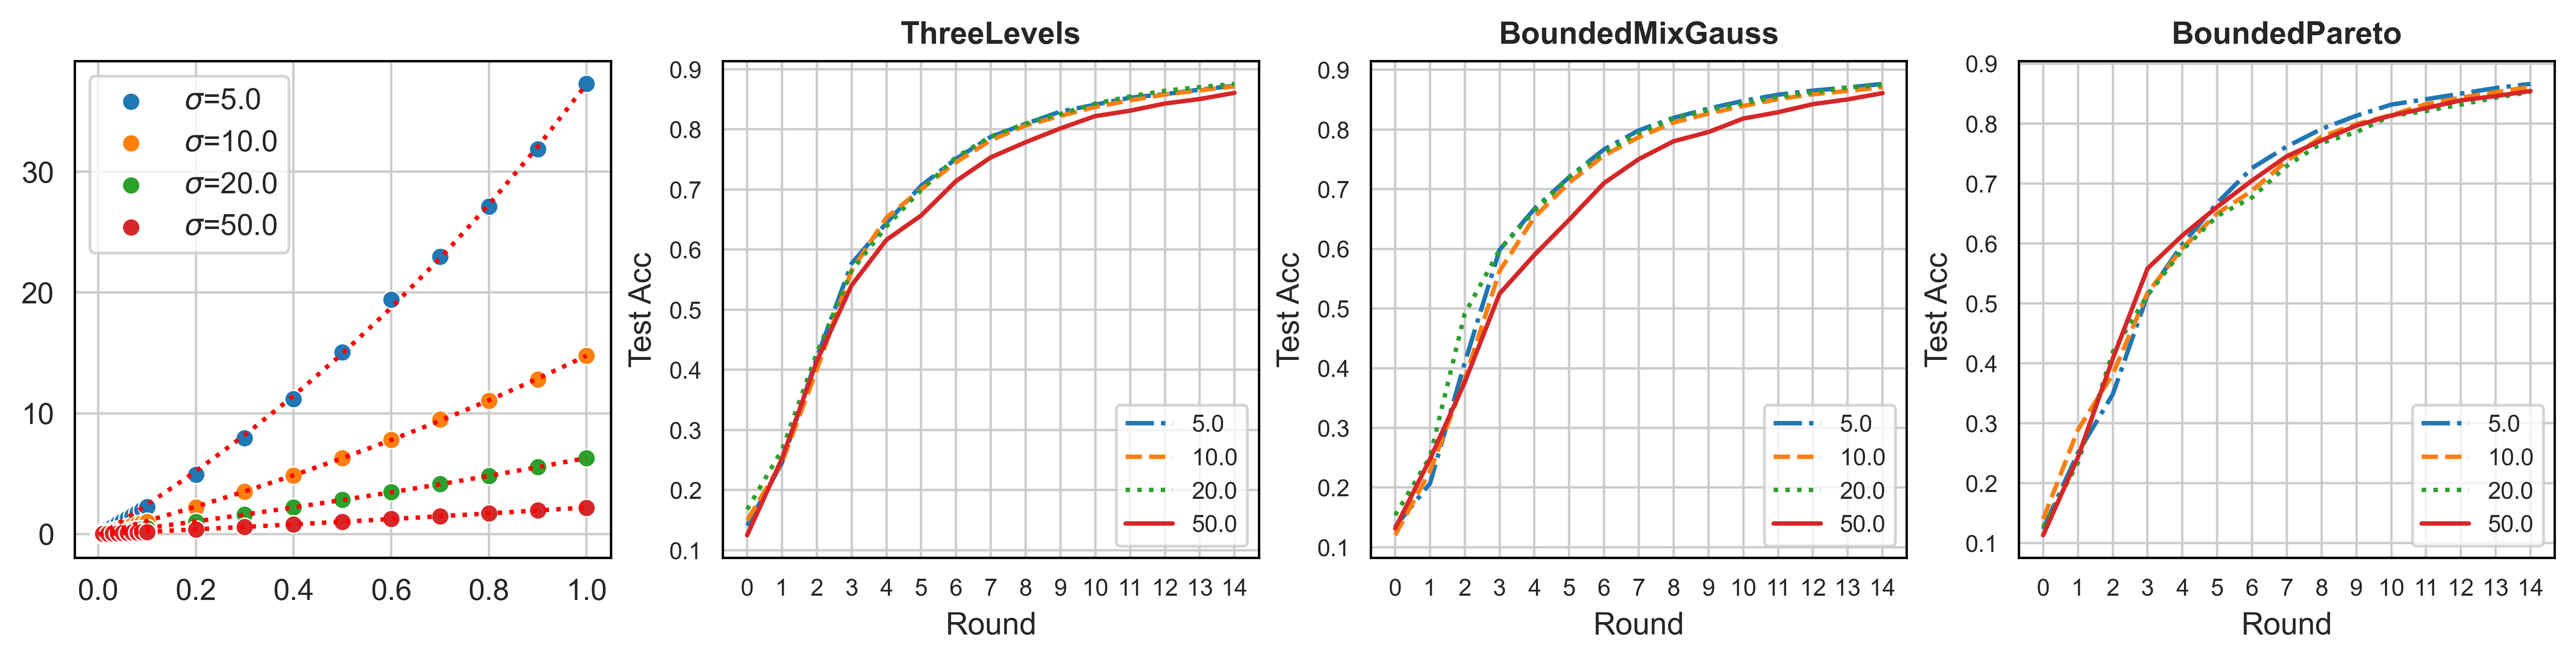

In [31]:
# vision
plt.close('all')
fig, axs = plt.subplots(1, 4, figsize=(12, 3), constrained_layout=True, dpi=500)

d = deltas[0]

for j, nm in enumerate(nms[1:]): # [5.0, 10.0, 20.0, 50.0]
    # plot the curves
    examples=[]
    for inner_rate in inner_rates:
        total_rdp = compute_rdp_4fed(
                noise_multiplier=nm,
                inner_rate=inner_rate, 
                outer_rate=outer_rate, 
                inner_steps=inner_steps, 
                outer_steps=outer_steps,
                alphas=orders)
        eps, _ = privacy_analysis.get_privacy_spent(
            orders=orders, rdp=total_rdp, delta=target_delta)
        examples.append(eps)
    examples = np.array(examples, dtype=np.float32)

    popt, pcov = curve_fit(func, inner_rates, examples)
    r2 = r2_score(func(inner_rates, *popt), examples)
    print('r2 score of the curve fitting.', r2)

    sns.scatterplot(x=inner_rates, y=examples, label=f'$\sigma$={nm}', ax=axs[0]) # , T={outer_steps},$\\tau$={inner_steps},$\\lambda$={outer_rate}
    sns.lineplot(x=inner_rates, y=func(inner_rates, *popt), 
                 # label=func_str(popt[0],popt[1],popt[2])+f'(score={r2:7.6f})', 
                 color='red', linestyle='dotted', ax=axs[0])
        
    for i, e in enumerate(enames):
        cdf = results.loc[results["e"].str.contains(e, na=False)].loc[results["e"].str.contains("Ours", na=False)].loc[results["d"] == d].loc[results["nm"] == nm]
        perf_str = np.array(cdf["perf"].tolist())
        data_arr = np.array([json.loads(_str) for _str in perf_str])
        data_mean = data_arr.mean(axis=0)
        data_std = data_arr.std(axis=0)
        sns.lineplot(data=data_mean, label=nm, linestyle=linestyles[::-1][j][1], ax=axs[i+1])
        
        axs[i+1].set_title(f'{e}', **title_font)
        axs[i+1].legend(loc='upper right', prop=legend_font)
        axs[i+1].set_ylabel('Test Acc', **label_font)
        axs[i+1].set_xlabel('Round', **label_font)
    #     axs[i].set_ylim(0.85, 0.88)
        axs[i+1].set_xticks(range(15))
        axs[i+1].tick_params(labelsize=8)
        axs[i+1].legend(loc='lower right', prop=legend_font)

plt.savefig(os.path.join(results_dir, "fed_3plots.pdf"), dpi=500, bbox_inches='tight')
plt.show()

In [ ]:
from fedrpdp.accountants.rdp import RDPAccountant, compute_rdp_4fed, compute_rdp_4sgd
from fedrpdp.accountants.analysis import rdp as privacy_analysis

plt.close('all')
fig, ax = plt.subplots(1, 1, figsize=(4, 3), constrained_layout=True, dpi=200)

examples = []
for inner_rate in sample_rates:
    total_rdp = compute_rdp_4fed(
            noise_multiplier=noise_multiplier,
            inner_rate=inner_rate, 
            outer_rate=outer_rate, 
            inner_steps=inner_steps, 
            outer_steps=outer_steps,
            alphas=orders)
    eps, _ = privacy_analysis.get_privacy_spent(
        orders=orders, rdp=total_rdp, delta=target_delta)
    examples.append(eps)
examples = np.array(examples, dtype=np.float32)

popt, pcov = curve_fit(func, sample_rates, examples)
r2 = r2_score(func(sample_rates, *popt), examples)
print('r2 score of the curve fitting.', r2)

sns.scatterplot(x=sample_rates, y=examples, label=f'rPDP-FedAvg (T={outer_steps},$\\tau$={inner_steps},$\\lambda$={outer_rate})', ax=ax) 
sns.lineplot(x=sample_rates, y=func(sample_rates, *popt), 
             label=func_str(popt[0],popt[1],popt[2])+f"(score={r2:7.6f})", 
             color='red', linestyle='dotted', ax=ax)

del examples, popt, pcov

examples = []
for inner_rate in sample_rates:
    total_rdp = compute_rdp_4sgd(
            noise_multiplier=noise_multiplier,
            sample_rate=inner_rate, 
            steps=inner_steps*outer_steps,
            alphas=orders
        )
    # access the best alpha
    eps, _ = privacy_analysis.get_privacy_spent(
        orders=orders, rdp=total_rdp, delta=target_delta)
    examples.append(eps)
examples = np.array(examples, dtype=np.float32)

popt, pcov = curve_fit(func, sample_rates, examples)
r2 = r2_score(func(sample_rates, *popt), examples)
print('r2 score of the curve fitting.', r2)

sns.scatterplot(x=sample_rates, y=examples, label=f'rPDP-SGD (T={inner_steps*outer_steps})', ax=ax) 
sns.lineplot(x=sample_rates, y=func(sample_rates, *popt), 
             label=func_str(popt[0],popt[1],popt[2])+f'(score={r2:7.6f})', color='red', linestyle='dotted', ax=ax)

del examples, popt, pcov

ax.legend(prop=legend_font)
ax.set_ylabel(r'$\varepsilon*$($\delta$=1e-3)', **label_font)
ax.set_xlabel('Inclusion Probability', **label_font)
ax.tick_params(labelsize=8) #刻度
ax.set_title('The Inclusion Probability Estimation', **title_font)
plt.show()